In [1]:
#import packages 
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re, string
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.corpus import stopwords
from nltk import FreqDist


In [2]:
#import tweet data
data = pd.read_csv("tweets_tagged.csv",delimiter=',',encoding='latin-1')
print(data.head())

   Sr No                                              tweet  label
0      1  Hysteria surrounding #coronavirus NZ daycare r...      3
1      2  Thank you @TheOnion for dragging all of us und...      1
2      3  #avetmissdone is catching on faster than the #...      1
3      4  They just said #Tonysnell was back from the fl...      2
4      5  Forget locking them up on an island to die slo...      2


In [3]:
#remove urls 
def remove_URL(sample):
    """Remove URLs from a sample string"""
    return re.sub(r"http\S+", "", sample)
print(data['tweet'][1])
data['tweet']=[remove_URL(tweet) for tweet in data['tweet']]
print(data['tweet'][1])

Thank you @TheOnion for dragging all of us under the artful guise of satire. V helpful #coronavirus advice ?? https://t.co/Oly95Sul5f
Thank you @TheOnion for dragging all of us under the artful guise of satire. V helpful #coronavirus advice ?? 


In [4]:
#seperate dataframe to positive, negative, and both tweets
pos_tweets =data['tweet'][data['label']==1]
neg_tweets = data['tweet'][data['label']==3]
pos_neg_tweets = data['tweet'][data['label']!=2]

#examine the data
print(pos_neg_tweets.head())


0    Hysteria surrounding #coronavirus NZ daycare r...
1    Thank you @TheOnion for dragging all of us und...
2    #avetmissdone is catching on faster than the #...
5    Please keep posted!?????? #CoronaVirus #Gensan...
6     What did Richard Jefferson say? ?? #coronavirus 
Name: tweet, dtype: object


In [5]:
#to lower case  
pos_neg_tweets = [tweet.lower() for tweet in pos_neg_tweets]
pos_tweets = [tweet.lower() for tweet in pos_tweets]
neg_tweets = [tweet.lower() for tweet in neg_tweets]

In [6]:
print(pos_tweets[:1])
print(neg_tweets[:1])

['thank you @theonion for dragging all of us under the artful guise of satire. v helpful #coronavirus advice ?? ']
['hysteria surrounding #coronavirus nz daycare requesting all children who have visited a country with any confirmed cases be excluded for 2 weeks. this includes australia. so, despite us only visiting adelaide where there are no confirmed cases, we are in this category ??']


In [7]:
#use tokenizer 
pos_tokens = [word_tokenize(tweet) for tweet in pos_tweets]
neg_tokens = [word_tokenize(tweet) for tweet in neg_tweets]
tweet_tokens = [word_tokenize(tweet) for tweet in pos_neg_tweets]
print(pos_tokens[1])
print(neg_tokens[1])
print(tweet_tokens[1])

['#', 'avetmissdone', 'is', 'catching', 'on', 'faster', 'than', 'the', '#', 'coronavirus', '...', 'but', 'no', 'deaths', 'yet', '!', '?', '?']
['please', 'keep', 'posted', '!', '?', '?', '?', '?', '?', '?', '#', 'coronavirus', '#', 'gensan', '#', 'stelizabethhospitalinc', '#', 'sehi']
['thank', 'you', '@', 'theonion', 'for', 'dragging', 'all', 'of', 'us', 'under', 'the', 'artful', 'guise', 'of', 'satire', '.', 'v', 'helpful', '#', 'coronavirus', 'advice', '?', '?']


In [8]:
#normalization 
#tagging position of word in sentence
#show example for first tweet
print(pos_tag(tweet_tokens[1]))

[('thank', 'NN'), ('you', 'PRP'), ('@', 'VBP'), ('theonion', 'NN'), ('for', 'IN'), ('dragging', 'VBG'), ('all', 'DT'), ('of', 'IN'), ('us', 'PRP'), ('under', 'IN'), ('the', 'DT'), ('artful', 'JJ'), ('guise', 'NN'), ('of', 'IN'), ('satire', 'NN'), ('.', '.'), ('v', 'JJ'), ('helpful', 'JJ'), ('#', '#'), ('coronavirus', 'NN'), ('advice', 'NN'), ('?', '.'), ('?', '.')]


In [9]:
#apply lemmatizer
from nltk.stem.wordnet import WordNetLemmatizer
def lemmatize_sentence(tokens): #copy and pasted from blog
    lemmatizer = WordNetLemmatizer()
    lemmatized_sentence = []
    for word, tag in pos_tag(tokens):
        if tag.startswith('NN'):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'
        lemmatized_sentence.append(lemmatizer.lemmatize(word, pos))
    return lemmatized_sentence

print(lemmatize_sentence(neg_tokens[0]))

['hysteria', 'surround', '#', 'coronavirus', 'nz', 'daycare', 'request', 'all', 'child', 'who', 'have', 'visit', 'a', 'country', 'with', 'any', 'confirmed', 'case', 'be', 'exclude', 'for', '2', 'week', '.', 'this', 'include', 'australia', '.', 'so', ',', 'despite', 'us', 'only', 'visit', 'adelaide', 'where', 'there', 'be', 'no', 'confirmed', 'case', ',', 'we', 'be', 'in', 'this', 'category', '?', '?']


In [10]:
#remove noise (copy and pasted from blog)

    #I dont know how to remove the following : ''...' '..' '``'
    #I found this command to delete all punctuation: s.translate(str.maketrans('', '', string.punctuation)). how would I apply it?
def remove_noise(tweet_tokens, stop_words = ()):

    cleaned_tokens = []

    for token, tag in pos_tag(tweet_tokens):
        token = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|'\
                       '(?:%[0-9a-fA-F][0-9a-fA-F]))+','', token)
        token = re.sub("(@[A-Za-z0-9_]+)","", token)

        if tag.startswith("NN"):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'

        lemmatizer = WordNetLemmatizer()
        token = lemmatizer.lemmatize(token, pos)
        
        if len(token) > 0 and token not in string.punctuation and token.lower() not in stop_words:
            cleaned_tokens.append(token.lower())
    return cleaned_tokens

In [11]:
#define stopwords to remove
stop_words = stopwords.words('english')

In [12]:
#apply remove_noise function
pos_tokens_cleaned = []
neg_tokens_cleaned = []
tweet_tokens_cleaned = []

for tokens in pos_tokens:
    pos_tokens_cleaned.append(remove_noise(tokens, stop_words))

for tokens in neg_tokens:
    neg_tokens_cleaned.append(remove_noise(tokens, stop_words))

for tokens in tweet_tokens:
    tweet_tokens_cleaned.append(remove_noise(tokens, stop_words))

In [13]:
print(pos_tokens_cleaned[0])
print(neg_tokens_cleaned[0])
print(tweet_tokens_cleaned[0])

['thank', 'theonion', 'drag', 'us', 'artful', 'guise', 'satire', 'v', 'helpful', 'coronavirus', 'advice']
['hysteria', 'surround', 'coronavirus', 'nz', 'daycare', 'request', 'child', 'visit', 'country', 'confirmed', 'case', 'exclude', '2', 'week', 'include', 'australia', 'despite', 'us', 'visit', 'adelaide', 'confirmed', 'case', 'category']
['hysteria', 'surround', 'coronavirus', 'nz', 'daycare', 'request', 'child', 'visit', 'country', 'confirmed', 'case', 'exclude', '2', 'week', 'include', 'australia', 'despite', 'us', 'visit', 'adelaide', 'confirmed', 'case', 'category']


In [14]:
#Frequencies with get_all_words
def get_all_words(cleaned_tokens_list):
    for tokens in cleaned_tokens_list:
        for token in tokens:
            yield token

all_tokens = get_all_words(tweet_tokens_cleaned)


In [15]:
#word frequencies for all words - this does not allow to plot a histogram
freq_dist = FreqDist(all_tokens)
print(freq_dist.most_common(50))

[('coronavirus', 6621), ('china', 1223), ('case', 597), ("'s", 596), ('virus', 587), ('coronavirusoutbreak', 575), ('wuhan', 541), ('...', 528), ('spread', 467), ('people', 467), ('amp', 420), ('get', 372), ('corona', 323), ('new', 307), ('death', 306), ('health', 299), ('safe', 295), ('mask', 278), ('us', 274), ('update', 273), ('go', 269), ('outbreak', 265), ("n't", 265), ('late', 265), ('like', 259), ('time', 250), ("''", 229), ('confirm', 228), ('say', 226), ('know', 225), ('day', 225), ('news', 223), ('please', 221), ('stay', 217), ('good', 215), ('world', 209), ('chinese', 207), ('country', 206), ('``', 204), ('one', 204), ('1', 199), ('need', 196), ('infect', 195), ('make', 193), ('..', 192), ('2', 186), ('everyone', 186), ('take', 185), ('2019ncov', 185), ('hospital', 170)]


In [16]:
#count words with counter function to later drop most frequent words and plot a histogram

word_counter={}
for tweet in tweet_tokens_cleaned:
    for word in tweet:
        if word in word_counter:
            word_counter[word] +=1
        else:
            word_counter[word] = 1

popular_words = sorted(word_counter, key = word_counter.get, reverse = True)
top_50=popular_words[:50]
top_10 = popular_words[:10]
#print top 50 words
print(top_50)  
 

['coronavirus', 'china', 'case', "'s", 'virus', 'coronavirusoutbreak', 'wuhan', '...', 'spread', 'people', 'amp', 'get', 'corona', 'new', 'death', 'health', 'safe', 'mask', 'us', 'update', 'go', 'outbreak', "n't", 'late', 'like', 'time', "''", 'confirm', 'say', 'know', 'day', 'news', 'please', 'stay', 'good', 'world', 'chinese', 'country', '``', 'one', '1', 'need', 'infect', 'make', '..', '2', 'everyone', 'take', '2019ncov', 'hospital']


In [17]:
#plot most distribution of 50 most common words
#get values of word_counter for most common 50 words
freq = []
words = []
sorted_freq=dict(sorted(word_counter.items(), key=lambda item: item[1], reverse=True))
for key, value in sorted_freq.items():
    if key in top_50:
        freq.append(value)
        words.append(key)


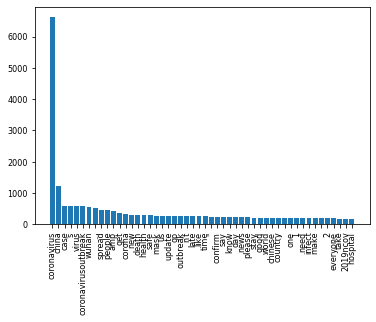

In [18]:
#make bar plot of most frequent words
plt.bar(height=freq, x=words, width=0.8)
plt.xticks(rotation=90)
plt.tick_params(axis='both', which='major', labelsize=8)
plt.show()

In [20]:
#make list of pos and negative words from list of tweets to be able to delete most frequent words and count words with counter function looping over list
pos_words = []
neg_words = []

for tweet in pos_tokens_cleaned:
    for word in tweet:
        pos_words.append(word)
        
for tweet in neg_tokens_cleaned:
    for word in tweet:
        neg_words.append(word)
        

In [40]:
#count and plot top words in positive and negative tweets that are not in top50
count_pos={}
for word in pos_words:
    if word not in top_50:
        if word in count_pos:
            count_pos[word] +=1
        else:
            count_pos[word] = 1

popular_pos_words = sorted(count_pos, key = count_pos.get, reverse = True)
top_20_pos_words=popular_pos_words[:20]
count_neg={}
for word in neg_words:
    if word not in top_50:
        if word in count_neg:
            count_neg[word] +=1
        else:
            count_neg[word] = 1

popular_neg_words = sorted(count_neg, key = count_neg.get, reverse = True)
top_20_neg_words=popular_neg_words[:20]

In [42]:
#get frequencies from dictionaries in a sorted way
freq_pos = []
words_pos = []
sorted_freq_pos=dict(sorted(count_pos.items(), key=lambda item: item[1], reverse=True))


for key, value in sorted_freq_pos.items():
    if key in top_20_pos_words:
        freq_pos.append(value)
        words_pos.append(key)
        
freq_neg = []
words_neg = []
sorted_freq_neg=dict(sorted(count_neg.items(), key=lambda item: item[1], reverse=True))
for key, value in sorted_freq_neg.items():
    if key in top_20_neg_words:
        freq_neg.append(value)
        words_neg.append(key)


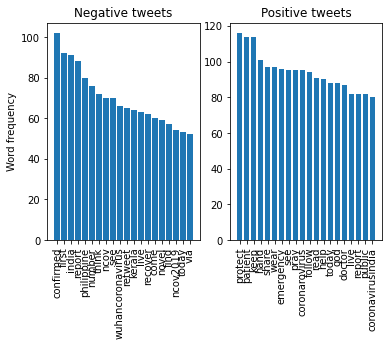

Text(0.5, 0.98, 'Most common words in positive and negative tweets')

<Figure size 432x288 with 0 Axes>

In [48]:
#make bar plot of frequencies - I don't know how to improve readability of axis labels
plt.subplot(1,2,1)
#This will create first plot
pop = plt.bar(words_neg, freq_neg)
plt.title('Negative tweets')
plt.ylabel('Word frequency')
plt.xticks(rotation='vertical')
#The below code will create the second plot.
plt.subplot(1,2,2)
#This will createthe second plot
gdp =plt.bar(words_pos, freq_pos)
plt.title('Positive tweets')
plt.xticks( rotation='vertical')
plt.show()     
plt.suptitle('Most common words in positive and negative tweets')
